# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize

## 1 Logistic Regression

In [2]:
data = np.loadtxt("ex2data1.txt", delimiter=',')
X = data[:, [0, 1]]
y = data[:, 2]

In [3]:
X[:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [4]:
y[:5]

array([0., 0., 0., 1., 1.])

### 1.1 Visualizing the data

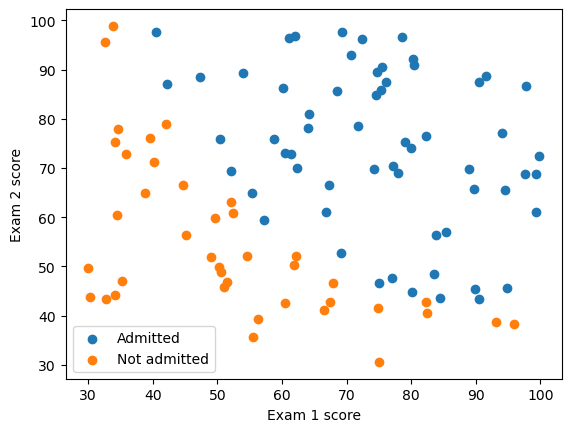

In [5]:
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Admitted")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not admitted")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

### 1.2 Implementation

### 1.2.1 Warmup exercise: sigmoid function

$$h_{\theta}(x) = g(\theta^T x)$$

$$g(z) = \frac{1}{1 + e^{-z}}$$

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

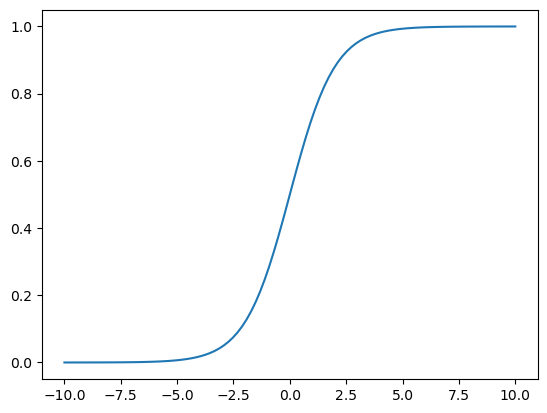

In [7]:
plt.plot()
X_plot = np.linspace(-10, 10, 100)
plt.plot(X_plot, sigmoid(X_plot))
plt.show()

### 1.2.2 Cost function and gradient

$$J(\theta) = \frac{1}{m}[\sum_{i=1}^m
    {-y^{(i)} \log{h_{\theta}}(x^{(i)}) - (1 - y^{(i)}) \log{(1 - h_{\theta}}(x^{(i)}))}]$$

$$\frac{\partial J(\theta)}{\partial \theta_j} =
    \frac{1}{m} \sum_{i=1}^m{(h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j}$$

In [8]:
def costFunction(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    J = -(np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
    grad = np.dot(X.T, h - y) / X.shape[0]
    return J, grad

In [9]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([0, 0, 0])
J, grad = costFunction(theta, X_train, y)
print(J)  # 0.693
print(grad)  # -0.1000 -12.0092 -11.2628

0.6931471805599452
[ -0.1        -12.00921659 -11.26284221]


In [10]:
X, X_train

(array([[34.62365962, 78.02469282],
        [30.28671077, 43.89499752],
        [35.84740877, 72.90219803],
        [60.18259939, 86.3085521 ],
        [79.03273605, 75.34437644],
        [45.08327748, 56.31637178],
        [61.10666454, 96.51142588],
        [75.02474557, 46.55401354],
        [76.0987867 , 87.42056972],
        [84.43281996, 43.53339331],
        [95.86155507, 38.22527806],
        [75.01365839, 30.60326323],
        [82.30705337, 76.4819633 ],
        [69.36458876, 97.71869196],
        [39.53833914, 76.03681085],
        [53.97105215, 89.20735014],
        [69.07014406, 52.74046973],
        [67.94685548, 46.67857411],
        [70.66150955, 92.92713789],
        [76.97878373, 47.57596365],
        [67.37202755, 42.83843832],
        [89.67677575, 65.79936593],
        [50.53478829, 48.85581153],
        [34.21206098, 44.2095286 ],
        [77.92409145, 68.97235999],
        [62.27101367, 69.95445795],
        [80.19018075, 44.82162893],
        [93.1143888 , 38.800

In [11]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([-24, 0.2, 0.2])
J, grad = costFunction(theta, X_train, y)
print(J)  # 0.218
print(grad)  # 0.043 2.566 2.647

0.21833019382659785
[0.04290299 2.56623412 2.64679737]


### 1.2.3 Learning parameters using fminunc

In [12]:
def cost(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    J = - (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
    return J


def gradient(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, h - y) / X.shape[0]
    return grad


X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([0, 0, 0])
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, y),
                        method='Newton-CG', jac=gradient)
print(res.fun)  # 0.203
print(res.x)  # -25.161 0.206 0.201

0.20349771382261178
[-25.15226504   0.20615918   0.20139821]


In [13]:
def plotDecisionBoundary(theta, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot = np.hstack((np.ones((X_plot.shape[0], 1)), X_plot))
    y_plot = np.dot(X_plot, theta).reshape(xx.shape)
    
    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Admitted")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not admitted")
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend()
    plt.show()

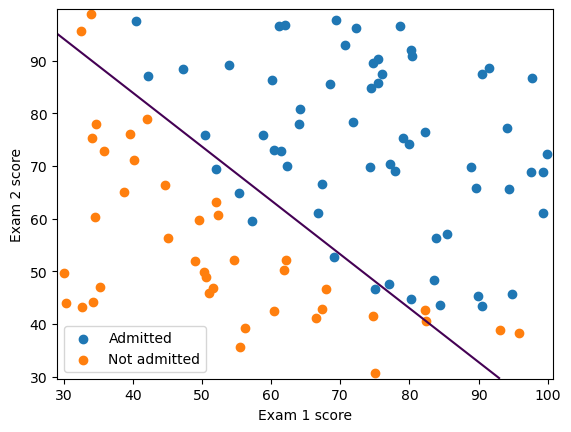

In [14]:
plotDecisionBoundary(res.x, X, y)

### 1.2.4 Evaluating logistic regression

In [15]:
prob = sigmoid(np.dot(np.array([1, 45, 85]), res.x))
print(prob)  # 0.775 +/- 0.002

0.7762154596501379


In [16]:
def predict(theta, X):
    X_train = np.hstack((np.ones((X.shape[0], 1)), X))
    prob = sigmoid(np.dot(X_train, theta))
    return (prob >= 0.5).astype(int)

In [17]:
np.mean(predict(res.x, X) == y)  # 0.89

0.89

## 2 Regularized logistic regression

In [18]:
data = np.loadtxt("ex2data2.txt", delimiter=',')
X = data[:, [0, 1]]
y = data[:, 2]

In [19]:
X[:5]

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

In [20]:
y[:5]

array([1., 1., 1., 1., 1.])

### 2.1 Visualizing the data

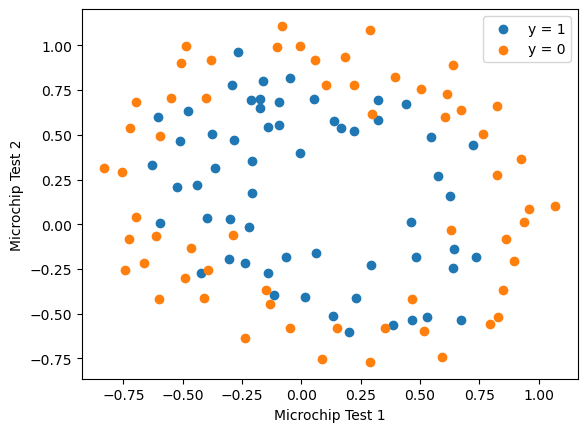

In [21]:
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="y = 1")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="y = 0")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend()
plt.show()

### 2.2 Feature mapping

In [22]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones((X1.shape[0], 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.hstack((out, (X1 ** (i - j) * X2 ** j)[:, np.newaxis]))
    return out

In [23]:
X_train = mapFeature(X[:, 0], X[:, 1])

In [24]:
X_train

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

### 2.3 Cost function and gradient

$$J(\theta) = \frac{1}{m}[\sum_{i=1}^m
    {-y^{(i)} \log{h_{\theta}}(x^{(i)}) - (1 - y^{(i)}) \log{(1 - h_{\theta}}(x^{(i)}))}] +
    \frac{\lambda}{2m}\sum_{j=1}^n{\theta_j^2}$$

$$\frac{\partial J(\theta)}{\partial \theta_j} =
    \frac{1}{m} \sum_{i=1}^m{(h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j} \quad (j = 0)$$

$$\frac{\partial J(\theta)}{\partial \theta_j} =
    (\frac{1}{m} \sum_{i=1}^m{(h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j}) +
    \frac{\lambda}{m}\theta_j \quad (j \neq 0)$$

In [25]:
def costFunctionReg(theta, X, y, lam):
    h = sigmoid(np.dot(X, theta))
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    J = (-(np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
         + lam * np.dot(t, t) / (2 * X.shape[0]))
    grad = np.dot(X.T, h - y) / X.shape[0] + lam * t / X.shape[0]
    return J, grad

In [26]:
lam = 1
theta = np.zeros(X_train.shape[1])
J, grad = costFunctionReg(theta, X_train, y, lam)
print(J)  # 0.693
print(grad[:5])  # 0.0085 0.0188 0.0001 0.0503 0.0115

0.693147180559945
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]


In [27]:
lam = 10
theta = np.ones(X_train.shape[1])
J, grad = costFunctionReg(theta, X_train, y, lam)
print(J)  # 3.16
print(grad[:5])  # 0.3460 0.1614 0.1948 0.2269 0.0922

3.1645093316150095
[0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]


In [28]:
def cost(theta, X, y, lam):
    h = sigmoid(np.dot(X, theta))
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    J = (-(np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
         + lam * np.dot(t, t) / (2 * X.shape[0]))
    return J


def gradient(theta, X, y, lam):
    h = sigmoid(np.dot(X, theta))
    t = np.zeros(len(theta))
    t[1:] = theta[1:]
    grad = np.dot(X.T, h - y) / X.shape[0] + lam * t / X.shape[0]
    return grad


lam = 1
theta = np.zeros(X_train.shape[1])
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, y, lam),
                        method='Newton-CG', jac=gradient)
print(res.fun)
print(res.x[:5])

0.5290027297129041
[ 1.27273935  0.62527393  1.1810882  -2.01996132 -0.91742288]


In [29]:
res.x

array([ 1.27273935,  0.62527393,  1.1810882 , -2.01996132, -0.91742288,
       -1.43166578,  0.12400333, -0.36553375, -0.35724097, -0.17513111,
       -1.45815703, -0.05099081, -0.61555439, -0.2747075 , -1.19281316,
       -0.24218923, -0.20600665, -0.04473073, -0.27778428, -0.29537838,
       -0.45635572, -1.04320227,  0.02777157, -0.29243091,  0.01556674,
       -0.32738013, -0.1438856 , -0.92465213])

In [30]:
def plotDecisionBoundary(theta, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot = mapFeature(X_plot[:, 0], X_plot[:, 1])
    y_plot = np.dot(X_plot, theta).reshape(xx.shape)
    
    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="y = 1")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="y = 0")
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.xlabel("Microchip Test 1")
    plt.ylabel("Microchip Test 2")
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.show()

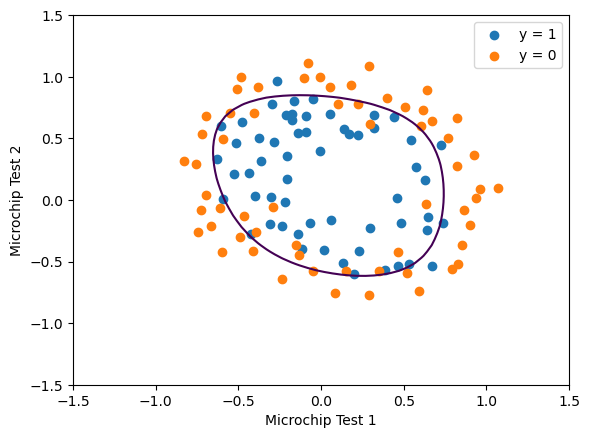

In [31]:
plotDecisionBoundary(res.x, X, y)

In [32]:
def predict(theta, X):
    X_train = mapFeature(X[:, 0], X[:, 1])
    prob = sigmoid(np.dot(X_train, theta))
    return (prob >= 0.5).astype(int)

In [33]:
np.mean(predict(res.x, X) == y)  # 0.831

0.8305084745762712

In [34]:
# different regularization parameters

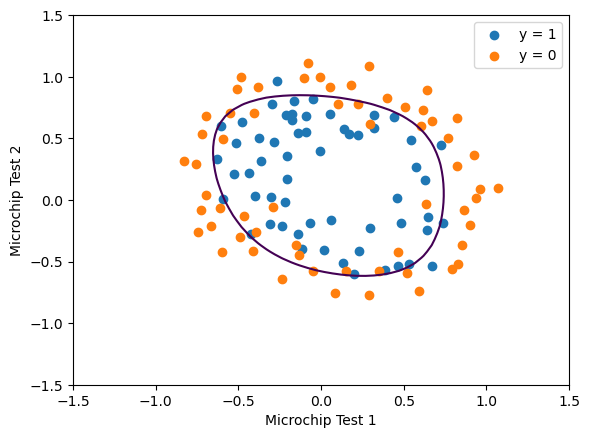

In [34]:
lam = 1
theta = np.zeros(X_train.shape[1])
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, y, lam),
                        method='Newton-CG', jac=gradient)
plotDecisionBoundary(res.x, X, y)

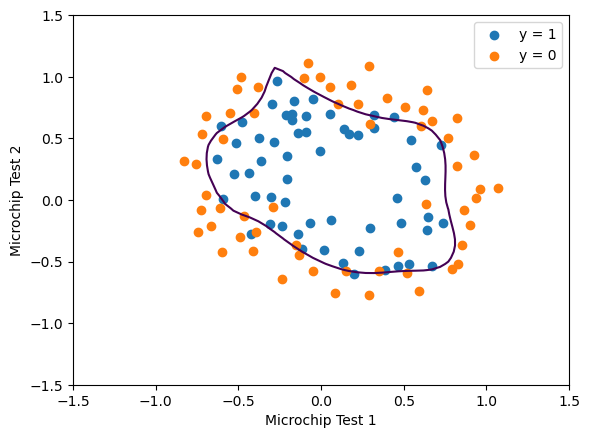

In [36]:
# overfitting
lam = 0
theta = np.zeros(X_train.shape[1])
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, y, lam),
                        method='Newton-CG', jac=gradient)
plotDecisionBoundary(res.x, X, y)

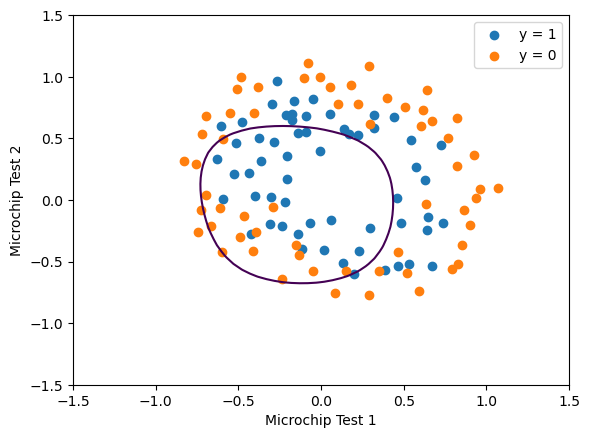

In [37]:
# underfitting
lam = 100
theta = np.zeros(X_train.shape[1])
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, y, lam),
                        method='Newton-CG', jac=gradient)
plotDecisionBoundary(res.x, X, y)